In [26]:
import pandas as pd

In [27]:
df=pd.read_csv('./20220129_friction_data.csv')

In [28]:
df

,ds,y
0,2022/1/29 0:01,0.169151
1,2022/1/29 0:02,0.146352
2,2022/1/29 0:03,0.162279
3,2022/1/29 0:04,0.121265
4,2022/1/29 0:05,0.151398
...,...,...
1495,2022/1/30 0:55,0.024601
1496,2022/1/30 0:56,0.022599
1497,2022/1/30 0:57,0.017890
1498,2022/1/30 0:58,0.026703


In [74]:
from prophet import Prophet
model = Prophet(growth='linear',n_changepoints=100,changepoint_range=0.8,interval_width = 0.8)
#df['cap'] = 0.2
df['floor'] = 0.0

In [75]:
model.fit(df[:1100])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [76]:
future = model.make_future_dataframe(2000,freq='min')
#future['cap'] = 0.2
future['floor'] = 0.0

In [77]:
future

,ds,floor
0,2022-01-29 00:01:00,0.0
1,2022-01-29 00:02:00,0.0
2,2022-01-29 00:03:00,0.0
3,2022-01-29 00:04:00,0.0
4,2022-01-29 00:05:00,0.0
...,...,...
3094,2022-01-31 03:35:00,0.0
3095,2022-01-31 03:36:00,0.0
3096,2022-01-31 03:37:00,0.0
3097,2022-01-31 03:38:00,0.0


In [78]:
forecast = model.predict(future)

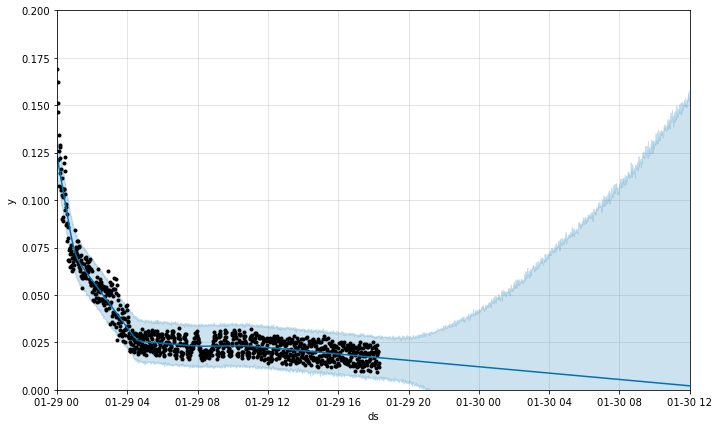

In [79]:
import matplotlib.pyplot as plt
from datetime import datetime as dt
df2=model.plot(forecast)
plt.xlim([dt(2022,1,29,0,0,0),dt(2022,1,30,12)])
plt.ylim(0.0,0.20)
plt.show()

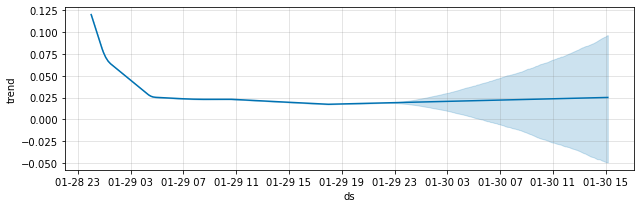

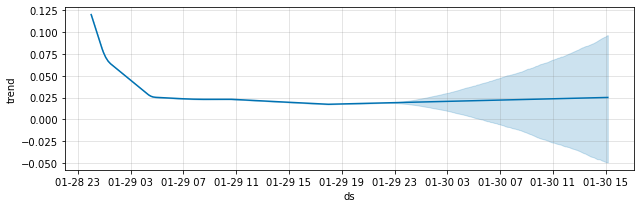

In [19]:
model.plot_components(forecast)

In [352]:
with pd.ExcelWriter('./friction_prediction.xlsx') as writer:
    forecast.to_excel(writer, sheet_name='sheet1')